# Algoritmo de detección de circulos en imágenes

In [176]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas
from PIL import Image
#Import math Library
import math

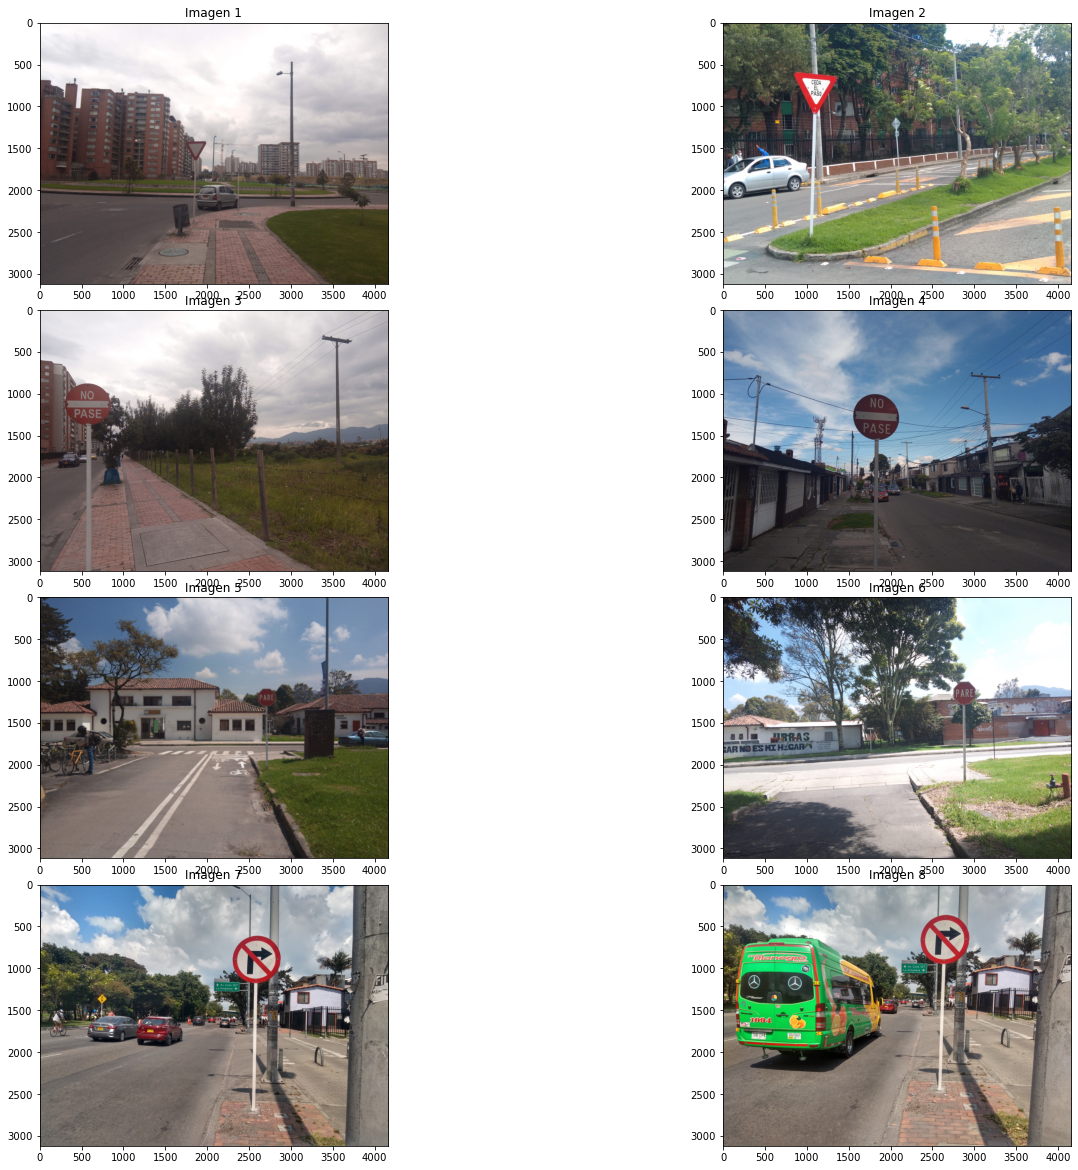

In [760]:
#lectura de las imágenes
ima1=cv2.imread("img/Cedapaso1.jpg")
ima2=cv2.imread("img/Cedapaso2.jpg")
ima3=cv2.imread("img/Nopase1.jpg")
ima4=cv2.imread("img/Nopase2.jpg")
ima5=cv2.imread("img/Pare1.jpg")
ima6=cv2.imread("img/Pare2.jpg")
ima7=cv2.imread("img/Prohibidogiroder1.jpg")
ima8=cv2.imread("img/Prohibidogiroder2.jpg")
ima9=cv2.imread("img/ima10.jpg")
ima10=cv2.imread("img/Pare8.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
ima7=cv2.cvtColor(ima7,cv2.COLOR_BGR2RGB)
ima8=cv2.cvtColor(ima8,cv2.COLOR_BGR2RGB)
ima9=cv2.cvtColor(ima9,cv2.COLOR_BGR2RGB)
ima10=cv2.cvtColor(ima10,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(4,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(4,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(4,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(4,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(4,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplot(4,2,7);plt.imshow(ima7),plt.title('Imagen 7')
plt.subplot(4,2,8);plt.imshow(ima8),plt.title('Imagen 8')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

# Ubralisación HSV

In [702]:
def umbral_hsv_rojo(imagen):
    redBajo1 = np.array([0,85,10],np.uint8) 
    redAlto1 = np.array([8,255,255],np.uint8)
    redBajo2 = np.array([165,85,10],np.uint8) 
    redAlto2 = np.array([180,255,255],np.uint8) 
    img_hsv = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    maskRed1 = cv2.inRange(img_hsv, redBajo1, redAlto1)
    maskRed2 = cv2.inRange(img_hsv, redBajo2, redAlto2)
    maskRed = cv2.add(maskRed1,maskRed2)
    #res= cv2.bitwise_and(imagen,imagen,maskRed=maskRed)
    plt.figure();
    plt.imshow(imagen),plt.xticks([]), plt.yticks([])
    plt.figure();
    plt.subplot(1,2,1);plt.imshow(maskRed, cmap='gray'),plt.title('1'),plt.xticks([]), plt.yticks([])
    #plt.subplot(1,2,2);plt.imshow(res),plt.title('2'),plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    return maskRed

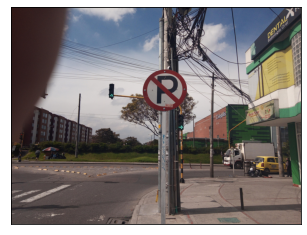

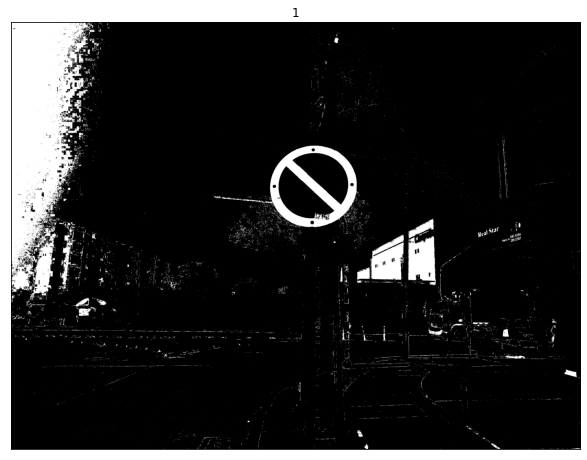

In [761]:
ima=ima9.copy()
ima_umb=umbral_hsv_rojo(ima)
plt.imshow(ima_umb,cmap="gray")

## Llenado de Señales

In [765]:
def encontrar_semilla(imagen):
    semilla=None
    h,w=imagen.shape
    h=h-1
    w=w-1
    if imagen[0,0]==0:
        semilla=(0,0)
    elif imagen[h,0]==0:
        semilla=(h,0)
    elif imagen[h,w]==0:
        semilla=(h,w)
    elif imagen[0,w]==0:
        semilla=(0,w)
    else:
        print("no pudo encontrar una buena semilla")
    return semilla

In [766]:
def llenado(imagen):
    
    im_floodfill = imagen.copy()
    h, w = imagen.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    seed=encontrar_semilla(imagen)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, seed, 255);

     # Invert floodfilled image

    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.

    im_out = imagen | im_floodfill_inv
    return im_out

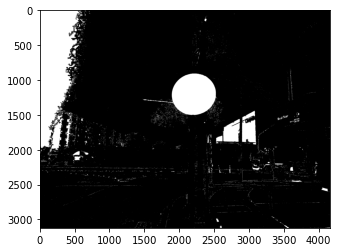

In [767]:
ima_llenado=llenado(ima_umb)
plt.imshow(ima_llenado, cmap="gray")

# Operaciones morfológicas

In [768]:
def erosion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.erode(ima,kernel)
    return ima

In [769]:
def dilatacion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.dilate(ima,kernel,n)
    return ima

In [770]:
def apertura(imagen,a,b,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima= cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)
    return ima

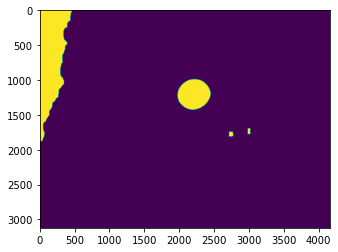

In [771]:
ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
plt.imshow(ima_erosion)

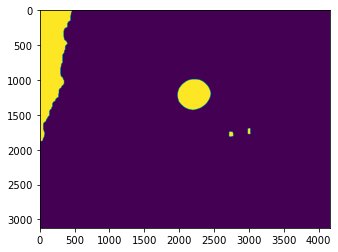

In [775]:
ima_apertura=apertura(ima_erosion,22,22,"elipse")
plt.imshow(ima_apertura)

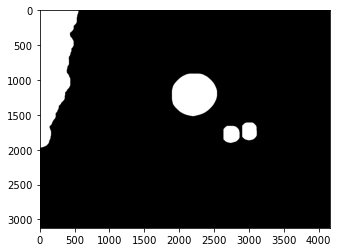

In [776]:
ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
plt.imshow(ima_dilatacion,cmap="gray")

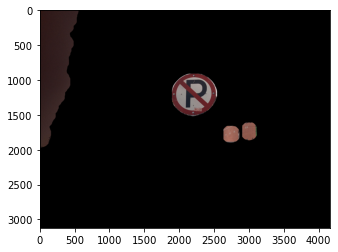

In [777]:
ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
plt.imshow(ima_final)

# Clasificador

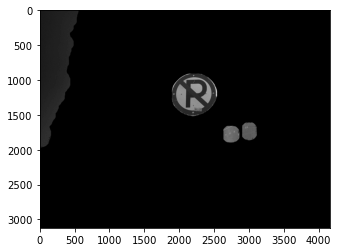

In [778]:
ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
plt.imshow(ima_bw,cmap="gray")

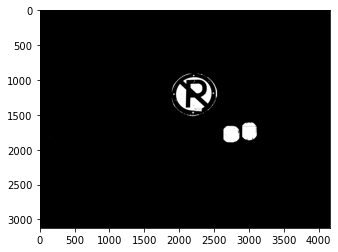

In [779]:
ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap="gray")

In [780]:
def extraccion_ROI(imagen):
    imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    ima=imagen
    ima_umb=umbral_hsv_rojo(ima)
    ima_llenado=llenado(ima_umb)
    ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
    ima_apertura=apertura(ima_erosion,10,10,"elipse")
    ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
    ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
    ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure()
    plt.subplot(4,2,1),plt.imshow(ima)
    plt.subplot(4,2,2),plt.imshow(ima_umb)
    plt.subplot(4,2,3),plt.imshow(ima_llenado)
    plt.subplot(4,2,4),plt.imshow(ima_erosion)
    plt.subplot(4,2,5),plt.imshow(ima_apertura)
    plt.subplot(4,2,6),plt.imshow(ima_dilatacion)
    plt.subplot(4,2,7),plt.imshow(ima_final)
    plt.subplot(4,2,8),plt.imshow(ima_bw)
    plt.subplot(5,2,9),plt.imshow(th1)
    return th1

## Momentos de Hu

In [781]:
moments = cv2.moments(th1)
huMoments = cv2.HuMoments(moments)

In [782]:
huMoments

array([[3.70757115e-03],
       [9.42153573e-06],
       [3.90013337e-09],
       [1.90071003e-09],
       [5.15832767e-18],
       [5.78142636e-12],
       [4.15538679e-19]])

In [783]:
# Log scale hu moments
for i in range(7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * np.log(np.abs(huMoments[i]))


In [784]:
huMoments

array([[ 5.59737829],
       [11.57251245],
       [19.36225509],
       [20.08103832],
       [39.80591924],
       [25.87637069],
       [42.32471125]])

## Detección de Blobs en las imágenes

### Detección de contornos

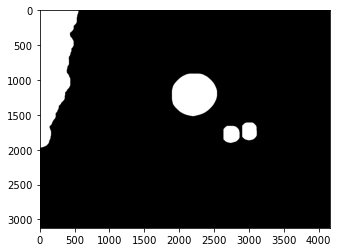

In [785]:
plt.imshow(ima_dilatacion,cmap="gray")

area del contorno0= 49068.0
area del contorno1= 47206.5
area del contorno2= 313009.0
area del contorno3= 3515.5


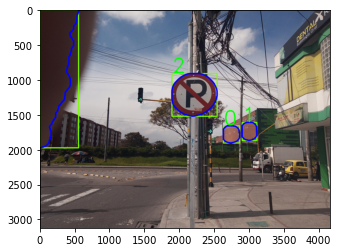

In [786]:
ima_contornos=ima.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
edges = cv2.morphologyEx(ima_dilatacion, cv2.MORPH_GRADIENT, kernel)
contours, hierarchy = cv2.findContours(edges , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    area=str(cv2.contourArea(contours[i]))
    cv2.rectangle(ima_contornos,(x,y),(x+w,y+h),(120,255,0),15)
    cv2.drawContours (ima_contornos, contours, i, (0, 0, 255), 20)
    cv2.putText(ima_contornos,str(i),(x,y-10),2,10,(0,255,0),10)
    print("area del contorno"+str(i)+"= "+area)
    
plt.imshow(ima_contornos)

### Extracción de características a partir de los contornos

In [787]:
for i in range(len(contours)):
    #Area del contorno
    area=cv2.contourArea(contours[i])
    #Longitud del contorno
    long=cv2.arcLength(contours[i],True)
    #Posición del centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")

area del contorno 0= 49068.0
Perímetro del contorno 0= 823.955404996872
Posición del Centroide 0= (2743,1776 )
Redondez del contorno 0= 0.9082403802409311
Compacidad del contorno 0= 13.835952340090472

area del contorno 1= 47206.5
Perímetro del contorno 1= 810.7422034740448
Posición del Centroide 1= (3002,1734 )
Redondez del contorno 1= 0.9024977006962909
Compacidad del contorno 1= 13.923991833623536

area del contorno 2= 313009.0
Perímetro del contorno 2= 2083.6895999908447
Posición del Centroide 2= (2209,1207 )
Redondez del contorno 2= 0.9059425144345437
Compacidad del contorno 2= 13.871046356845989

area del contorno 3= 3515.5
Perímetro del contorno 3= 4693.964981794357
Posición del Centroide 3= (339,1038 )
Redondez del contorno 3= 0.0020050133823715775
Compacidad del contorno 3= 6267.474683632969



 ### Extracción de Características usando aproximación de contorno

alpha usado= 0.001

area del contorno 0= 49074.5
Perímetro del contorno 0= 801.3124279975891
Posición del Centroide 0= (2743,1776 )
Redondez del contorno 0= 0.9604217583922077
Compacidad del contorno 0= 13.084221077410701

area del contorno 1= 47213.5
Perímetro del contorno 1= 791.5468378067017
Posición del Centroide 1= (3002,1734 )
Redondez del contorno 1= 0.9469407890149271
Compacidad del contorno 1= 13.270492474436102

area del contorno 2= 312650.0
Perímetro del contorno 2= 1992.763017654419
Posición del Centroide 2= (2209,1207 )
Redondez del contorno 2= 0.9893660132737364
Compacidad del contorno 2= 12.701437532484075

area del contorno 3= 3792.0
Perímetro del contorno 3= 4517.382904052734
Posición del Centroide 3= (319,1107 )
Redondez del contorno 3= 0.0023350940906828174
Compacidad del contorno 3= 5381.526450903986



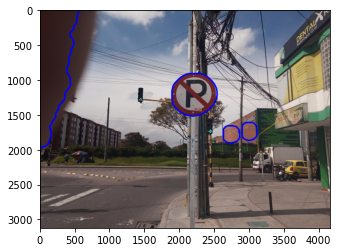

In [788]:
alpha=0.001
ima_aproximacion=ima.copy()
print("alpha usado= "+str(alpha))
print("")
for i in range(len(contours)):
    cnt=contours[i]
    epsilon = alpha*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    #Area del contorno
    area=cv2.contourArea(approx)
    #Longitud del contorno
    long=cv2.arcLength(approx,True)
    #Posición del centroide
    M = cv2.moments(approx)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    #dibujar contornos
    cv2.drawContours (ima_aproximacion, [approx], 0, (0, 0, 255), 20)
    
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")
    plt.imshow(ima_aproximacion)

### Mínimo rectangulo

Longitud lado largo 0= 245.0
Longitud Lado corto 0= 232.0
Relación entre lados 0= 1.0560344827586208

Longitud lado largo 1= 256.0
Longitud Lado corto 1= 210.0
Relación entre lados 1= 1.2190476190476192

Longitud lado largo 2= 639.9320068359375
Longitud Lado corto 2= 616.5971069335938
Relación entre lados 2= 1.0378446470798262

Longitud lado largo 3= 2047.099609375
Longitud Lado corto 3= 195.50192260742188
Relación entre lados 3= 10.470994771164904



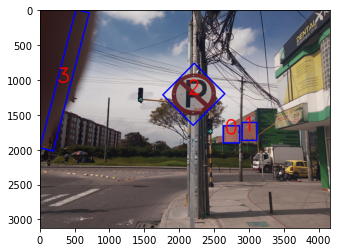

In [789]:
ima_min_rect=ima.copy()
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    #posición Centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    #Longitudes rectangulo
    a=cv2.arcLength(np.array([box[0],box[1]]),False)
    b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
    largo=np.max([a,b])
    corto=np.min([a,b])
    rel=largo/corto
    
    cv2.drawContours(ima_min_rect,[box],0,(0,0,255),20)
    cv2.putText(ima_min_rect,str(i),(cx-100,cy),2,10,(255,0,0),10)
    print("Longitud lado largo "+str(i)+"= "+str(largo))
    print("Longitud Lado corto "+str(i)+"= "+str(corto))
    print("Relación entre lados "+str(i)+"= "+str(rel))
    print("")
plt.imshow(ima_min_rect)

In [790]:
def getCharacteristics(contornos):
    caracteristicas=[]
    for i in range(len(contornos)):
        cont=contours[i]
        #Area del contorno
        area=cv2.contourArea(cont)
        #Longitud del contorno
        long=cv2.arcLength(cont,True)
        #Posición del centroide
        M = cv2.moments(cont)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cent=(cx,cy)
        #compacidad
        comp=long**2/area
        #redondez
        redon=4*np.pi*area/long**2
        #mínimo rectangulo
        rect = cv2.minAreaRect(cont)
        box = cv2.boxPoints(rect)
    
        #Longitudes rectangulo
        a=cv2.arcLength(np.array([box[0],box[1]]),False)
        b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
        largo=np.max([a,b])
        corto=np.min([a,b])
        rel=largo/corto
        
        #rectangulo limite
        x,y,w,h=cv2.boundingRect(contours[i])
        rect_lim={"x":x,
                 "y":y,
                 "w":w,
                 "h":h}
        
        diccionario={"Area":area,
                    "Perimetro":long,
                    "Centroide":cent,
                    "Compacidad":comp,
                    "Redondez":redon,
                    "Minimo Rectangulo":box,
                    "Lado largo":largo,
                    "Lado corto":corto,
                    "Relacion entre lados":rel,
                    "Rectangulo limite":rect_lim}
        caracteristicas.append(diccionario)
    return caracteristicas 
        

In [791]:
caracteristicas=getCharacteristics(contours)
imagenes=[]
for i in range(len(contours)):
    #obtiene la relación de lados
    rel=caracteristicas[i].get("Relacion entre lados")
    if rel<1.5 :
        rect_lim=caracteristicas[i].get("Rectangulo limite")
        x_ini=rect_lim.get("x")
        x_fin=rect_lim.get("x")+rect_lim.get("w")
        y_ini=rect_lim.get("y")
        y_fin=rect_lim.get("y")+rect_lim.get("h")
        imagen_cortada=ima_final[y_ini:y_fin,x_ini:x_fin,:]
        print(x_ini)
        print(x_fin)
        print(y_ini)
        print(x_fin)
        print("")
        imagenes.append(imagen_cortada)

2631
2864
1657
2864

2900
3111
1609
3111

1892
2541
909
2541



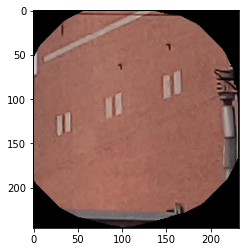

In [800]:
plt.imshow(imagenes[0])

In [793]:
th=[]
for i in range(len(imagenes)):
    ima_gris=cv2.cvtColor(imagenes[i],cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(ima_gris,100,255,cv2.THRESH_BINARY)
    th.append(th1)

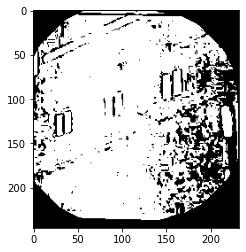

In [794]:
plt.imshow(th[0],cmap="gray")

In [795]:
for i in range(len(imagenes)):
    moments = cv2.moments(th[i])
    huMoments = cv2.HuMoments(moments)
    momentos={"Momentos de Hu":huMoments}
    caracteristicas[i].update(momentos)

In [796]:
caracteristicas[0]

{'Area': 49068.0,
 'Perimetro': 823.955404996872,
 'Centroide': (2743, 1776),
 'Compacidad': 13.835952340090472,
 'Redondez': 0.9082403802409311,
 'Minimo Rectangulo': array([[2631., 1902.],
        [2631., 1657.],
        [2863., 1657.],
        [2863., 1902.]], dtype=float32),
 'Lado largo': 245.0,
 'Lado corto': 232.0,
 'Relacion entre lados': 1.0560344827586208,
 'Rectangulo limite': {'x': 2631, 'y': 1657, 'w': 233, 'h': 246},
 'Momentos de Hu': array([[ 7.12565611e-04],
        [ 1.06725401e-08],
        [ 1.45897766e-12],
        [ 9.42596171e-13],
        [ 4.40652958e-25],
        [-9.63175721e-17],
        [-1.01375382e-24]])}